In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import homogeneity_score

In [2]:
dataset = pd.read_csv(r"C:\weatherAUS_EVA04.csv")

In [3]:
dataset.shape

(142193, 16)

In [4]:
dataset.head()

,Unnamed: 0,Fecha,Localizacion,TempMinima,TempMaxima,VelRafagaViento,DirViento9am,VelViento9am,VelViento3pm,Humedad9am,Humedad3pm,Presion3pm,Temperatura9pm,LluviaHoy,Riesgo_MM,LluviaMañana
0,0,2008-12-01,Albury,13.4,22.9,44.0,W,20.0,24.0,71.0,22.0,1007.1,16.9,No,0.0,No
1,1,2008-12-02,Albury,7.4,25.1,44.0,NNW,4.0,22.0,44.0,25.0,1007.8,17.2,No,0.0,No
2,2,2008-12-03,Albury,12.9,25.7,46.0,W,19.0,26.0,38.0,30.0,1008.7,21.0,No,0.0,No
3,3,2008-12-04,Albury,9.2,28.0,24.0,SE,11.0,9.0,45.0,16.0,1012.8,18.1,No,1.0,No
4,4,2008-12-05,Albury,17.5,32.3,41.0,ENE,7.0,20.0,82.0,33.0,1006.0,17.8,No,0.2,No


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       142193 non-null  int64  
 1   Fecha            142193 non-null  object 
 2   Localizacion     142193 non-null  object 
 3   TempMinima       142193 non-null  float64
 4   TempMaxima       142193 non-null  float64
 5   VelRafagaViento  142193 non-null  float64
 6   DirViento9am     142193 non-null  object 
 7   VelViento9am     142193 non-null  float64
 8   VelViento3pm     142193 non-null  float64
 9   Humedad9am       142193 non-null  float64
 10  Humedad3pm       142193 non-null  float64
 11  Presion3pm       142193 non-null  float64
 12  Temperatura9pm   142193 non-null  float64
 13  LluviaHoy        142193 non-null  object 
 14  Riesgo_MM        142193 non-null  float64
 15  LluviaMañana     142193 non-null  object 
dtypes: float64(10), int64(1), object(5)
me

In [6]:
dataset.drop_duplicates(inplace=True)

In [210]:
X = dataset.iloc[:,[7,9 ]].values
X

array([[20., 71.],
       [ 4., 44.],
       [19., 38.],
       ...,
       [13., 56.],
       [ 9., 53.],
       [13., 51.]])

In [211]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

F:\Universidad\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


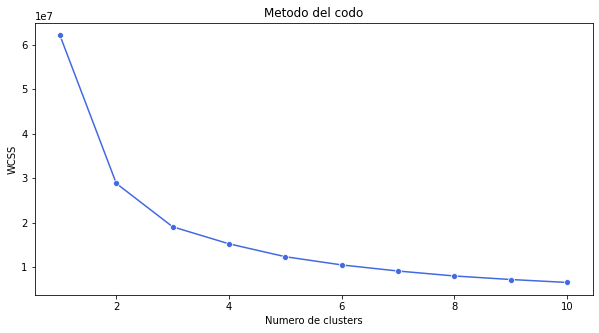

In [212]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11), wcss,marker='o',color='royalblue')
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [213]:
kmeans = KMeans(n_clusters =4 , init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [214]:
print(y_kmeans.flatten())

[2 1 3 ... 1 1 1]


F:\Universidad\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Universidad\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Universidad\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Universidad\lib\site-packages\seaborn\_decorators

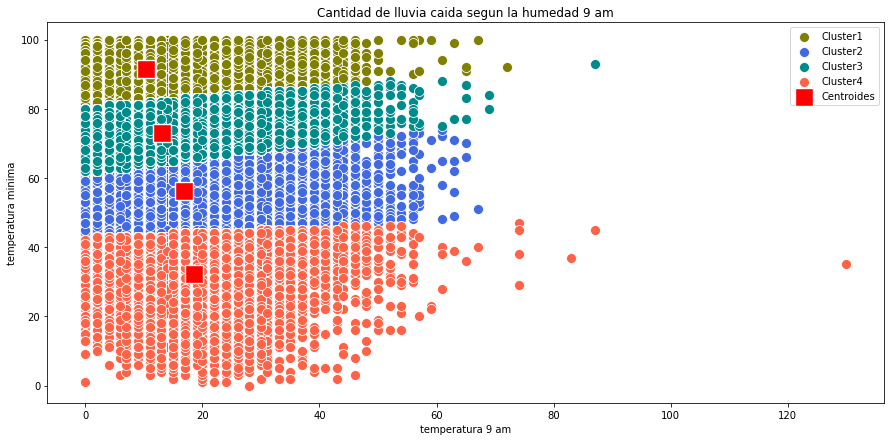

In [215]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'olive', label = 'Cluster1',s=100)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'royalblue', label = 'Cluster2',s=100)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'darkcyan', label = 'Cluster3',s=100)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'tomato', label = 'Cluster4',s=100)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster5',s=100)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroides',s=300, marker= ',')

plt.grid(False)
plt.title('Cantidad de lluvia caida segun la humedad 9 am')
plt.xlabel('temperatura 9 am')
plt.ylabel('temperatura minima')
plt.legend()
plt.show()